In [3]:
import os 
import netCDF4 as nc 
import numpy as np 

#Get all the nc file from the folder named as "Tmax_Nc"
file_list = os.listdir('Tmax_Nc')

#Get year wise nc file from the folder named as "Tmax_Nc"
file_list_2011 = [file for file in os.listdir('Tmax_Nc') if "2011" in file]
# Get month wise nc file form the folder named as "Tmax_Nc"
target_month = "01"
file_list_jan = [file for file in os.listdir('Tmax_Nc') if f"_{target_month}_" in file]


In [4]:
import os
import netCDF4 as nc
import numpy as np

file_list_2011 = [file for file in os.listdir('Tmax_Nc') if "2011" in file]
first_nc_file_2011 = file_list_2011[0]
print(first_nc_file_2011)
folder_path = "Tmax_NC"
full_path = os.path.join(folder_path, first_nc_file_2011)
with nc.Dataset(full_path, 'r') as nc_file: 
    #(lon_data,lat_data) = (nc_file.variables.get('lon')[:],nc_file.variables.get('lat')[:])
    temp_data = nc_file.variables.get('var_pred')[:]
    #print(temp_data)
    




Tmax_X_2011_01_01.nc


In [5]:
#average calculation
import os
import netCDF4 as nc
import numpy as np

def calculate_grid_averages(folder_path):
    # Initialize empty array to store accumulated values for each grid point
    empty_array = None

    # Count the number of files to later calculate the average
    num_files = 0

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".nc"):
            file_path = os.path.join(folder_path, filename)

            # Open the NetCDF file
            with nc.Dataset(file_path, 'r') as nc_file:    
                # Extract data from the 'var_pred' variable
                data = nc_file.variables.get('var_pred')[:]

                # Accumulate data for each grid point
                if empty_array is None:
                    # Initialize empty_array with the shape of the 'var_pred' variable
                    empty_array = np.zeros_like(data)

                empty_array += data
                num_files += 1

    # Calculate the average values for each element across all files
    if num_files > 0:
        average_array = empty_array / num_files
    else:
        average_array = None
        print("No NetCDF files found in the specified folder.")

    return average_array

# Replace 'your_folder_path' with the actual path to your folder containing nc files
folder_path = 'Tmax_Nc'
result = calculate_grid_averages(folder_path)

# Print or further process the average values
if result is not None:
    print("Average Values:")
else:
    print("No average values calculated.")

TypeError: 'NoneType' object is not subscriptable

In [7]:
#nc file creation 
import os
import netCDF4 as nc
import numpy as np

def create_and_update_nc_file(folder_path, new_file_path, variable_name, new_variable_data):
    # Get the information from the first NetCDF file in the folder
    sample_file = None
    for filename in os.listdir(folder_path):
        if filename.endswith(".nc"):
            sample_file = os.path.join(folder_path, filename)
            break

    if sample_file is not None:
        # Open the first NetCDF file to get metadata
        with nc.Dataset(sample_file, 'r') as nc_sample:
            # Create a new NetCDF file
            with nc.Dataset(new_file_path, 'w') as nc_new:
                # Copy global attributes
                nc_new.setncatts(nc_sample.__dict__)

                # Copy dimensions
                for dim_name, dim in nc_sample.dimensions.items():
                    nc_new.createDimension(dim_name, len(dim) if not dim.isunlimited() else None)

                # Copy variables and attributes, adding the new variable
                for var_name, var in nc_sample.variables.items():
                    if var_name == variable_name:
                        # Replace 'var_pred' with 'avg_pred'
                        new_var = nc_new.createVariable('avg_pred', var.dtype, var.dimensions)
                        new_var.setncatts({k: var.getncattr(k) for k in var.ncattrs()})
                        new_var[:] = new_variable_data
                    else:
                        # Copy other variables as it is
                        new_var = nc_new.createVariable(var_name, var.dtype, var.dimensions)
                        new_var.setncatts({k: var.getncattr(k) for k in var.ncattrs()})
                        new_var[:] = var[:]

                print(f"New NetCDF file '{new_file_path}' created successfully.")
    else:
        print("No NetCDF files found in the specified folder.")

# Replace 'your_folder_path' and 'your_new_file.nc' with the actual paths
folder_path = 'Tmax_Nc'
new_file_path = 'Tmax_Nc/average_file.nc'
variable_name = 'var_pred'  # Assuming this is the variable you want to replace
new_variable_data = result  # The calculated average_array

create_and_update_nc_file(folder_path, new_file_path, variable_name, new_variable_data)

New NetCDF file 'Tmax_Nc/average_file.nc' created successfully.


{'crs': <class 'netCDF4._netCDF4.Variable'>
int32 crs()
    proj4: +proj=longlat +datum=WGS84 +no_defs
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    units: degrees_east
    long_name: lon
unlimited dimensions: 
current shape = (163,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    units: degrees_north
    long_name: lat
unlimited dimensions: 
current shape = (82,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'avg_pred': <class 'netCDF4._netCDF4.Variable'>
float32 avg_pred(lat, lon)
    _FillValue: -3.4e+38
    grid_mapping: crs
    proj4: +proj=longlat +datum=WGS84 +no_defs
    min: -17.131324290770234
    max: 26.26869598456978
unlimited dimensions: 
current shape = (82, 163)
filling on}


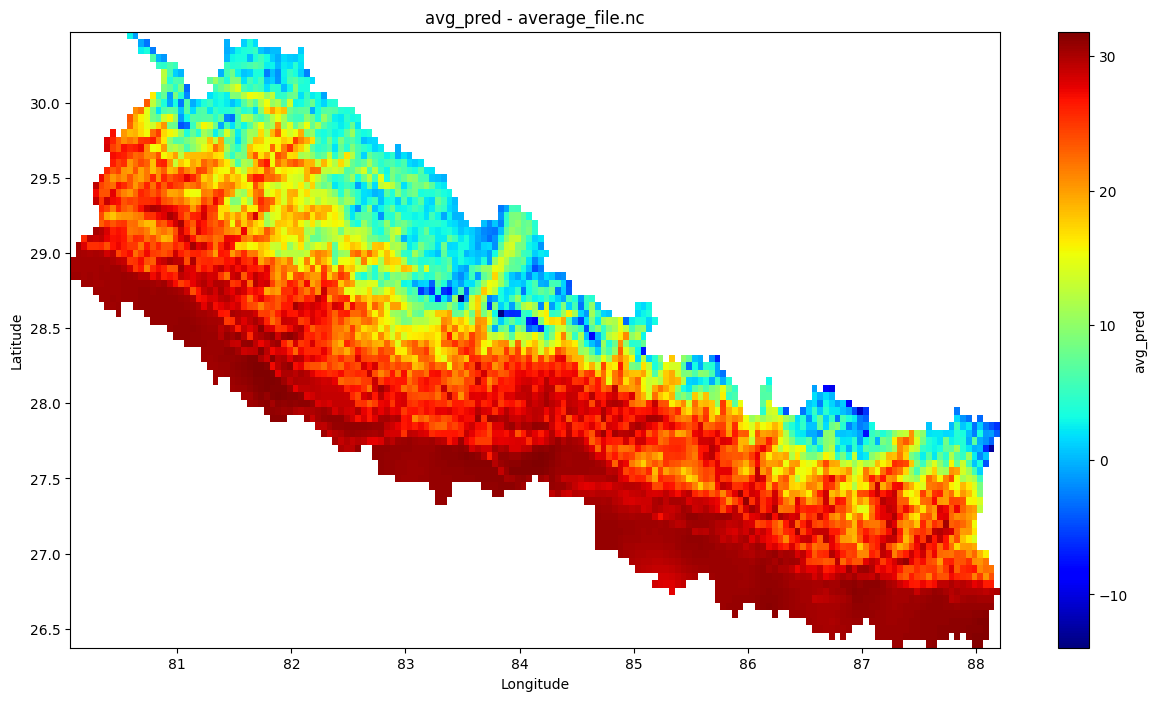

In [28]:
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

def visualize_nc_variable(file_path, variable_name):
    # Open the NetCDF file
    with nc.Dataset(file_path, 'r') as nc_file:
        # Extract data from the specified variable
        variable_data = nc_file.variables[variable_name][:]

        # Extract latitude and longitude data
        lon_data = nc_file.variables['lon'][:]
        lat_data = nc_file.variables['lat'][:]

        # Create a meshgrid for plotting
        lon, lat = np.meshgrid(lon_data, lat_data)

        # Plot the variable using pcolormesh
        plt.figure(figsize=(15, 8))
        plt.pcolormesh(lon, lat, variable_data, shading='auto', cmap='jet')
        plt.colorbar(label=f'{variable_name}')
        plt.title(f'{variable_name} - {os.path.basename(file_path)}')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

# Replace 'your_file.nc' and 'your_variable_name' with the actual file path and variable name
file_path = 'Tmax_NC/average_file.nc'
variable_name = 'avg_pred'

visualize_nc_variable(file_path, variable_name)

In [1]:
import os

folder_path = 'Tmax_NC/'

# List all files in the folder
all_files = os.listdir(folder_path)

# Filter files based on the desired pattern (e.g., containing "2011")
files_2011 = [file for file in all_files if '2011' in file]

# Print the resulting files
for file_2011 in files_2011:
    print(file_2011)

Tmax_X_2011_01_01.nc
Tmax_X_2011_01_02.nc
Tmax_X_2011_01_03.nc
Tmax_X_2011_01_04.nc
Tmax_X_2011_01_05.nc
Tmax_X_2011_01_06.nc
Tmax_X_2011_01_07.nc
Tmax_X_2011_01_08.nc
Tmax_X_2011_01_09.nc
Tmax_X_2011_01_10.nc
Tmax_X_2011_01_11.nc
Tmax_X_2011_01_12.nc
Tmax_X_2011_01_13.nc
Tmax_X_2011_01_14.nc
Tmax_X_2011_01_15.nc
Tmax_X_2011_01_16.nc
Tmax_X_2011_01_17.nc
Tmax_X_2011_01_18.nc
Tmax_X_2011_01_19.nc
Tmax_X_2011_01_20.nc
Tmax_X_2011_01_21.nc
Tmax_X_2011_01_22.nc
Tmax_X_2011_01_23.nc
Tmax_X_2011_01_24.nc
Tmax_X_2011_01_25.nc
Tmax_X_2011_01_26.nc
Tmax_X_2011_01_27.nc
Tmax_X_2011_01_28.nc
Tmax_X_2011_01_29.nc
Tmax_X_2011_01_30.nc
Tmax_X_2011_01_31.nc
Tmax_X_2011_02_01.nc
Tmax_X_2011_02_02.nc
Tmax_X_2011_02_03.nc
Tmax_X_2011_02_04.nc
Tmax_X_2011_02_05.nc
Tmax_X_2011_02_06.nc
Tmax_X_2011_02_07.nc
Tmax_X_2011_02_08.nc
Tmax_X_2011_02_09.nc
Tmax_X_2011_02_10.nc
Tmax_X_2011_02_11.nc
Tmax_X_2011_02_12.nc
Tmax_X_2011_02_13.nc
Tmax_X_2011_02_14.nc
Tmax_X_2011_02_15.nc
Tmax_X_2011_02_16.nc
Tmax_X_2011_0

   STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.68850 27.70975, 87.68891 27.70938...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...  
91.72057914733887
Mean Interpolated Temperature within the District: 30.57352638244629


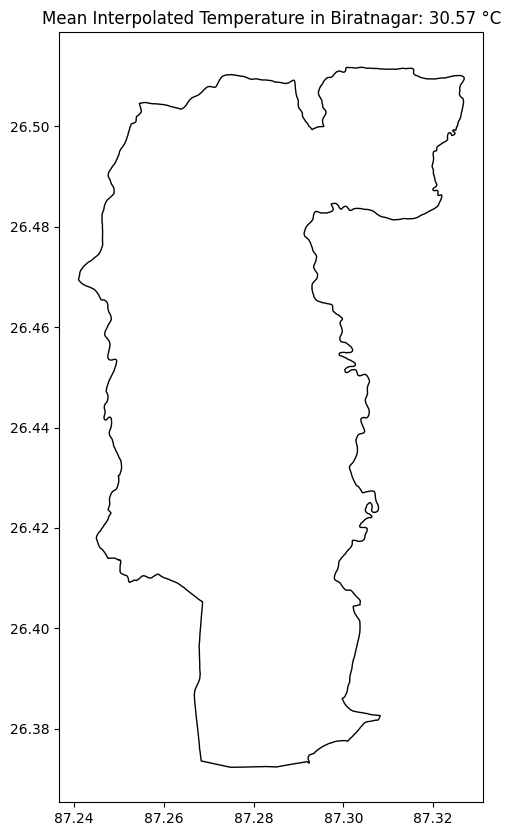

In [10]:
import netCDF4 as nc
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np

# Load the district boundary polygon (replace 'district_boundary.shp' with your actual file)
nepal_boundary_path = 'innershpfiles/'
nepal_boundary = gpd.read_file(nepal_boundary_path)
print(nepal_boundary.head())
location = "Biratnagar"
kathmandu_boundary = nepal_boundary[nepal_boundary['GaPa_NaPa'] == location]
# Load the NetCDF file

nc_file_path = 'Tmax_NC/average_file.nc'
nc_dataset = nc.Dataset(nc_file_path, 'r')

# Get latitude and longitude values from the NetCDF file
lats = nc_dataset.variables['lat'][:]
lons = nc_dataset.variables['lon'][:]

# Get the GeoTransform parameters
lon_start = lons[0]
lon_step = lons[1] - lons[0]
lat_start = lats[0]
lat_step = lats[1] - lats[0]

# Create a GeoDataFrame to store the grid cells
grid_cells = gpd.GeoDataFrame(geometry=[])

points = []
# Iterate through each grid cell in the NetCDF file
for lon in lons:
    for lat in lats:
        # Create a Point geometry for the grid cell
        point = Point(lon, lat)
        points.append(point)

# Create a GeoDataFrame from the list of Point geometries
grid_cells = gpd.GeoDataFrame(geometry=points)
# Spatially join the grid cells with the district boundary
grid_cells.crs = "EPSG:4326"  # Set CRS for heatmap_df, assuming WGS84

    # Reproject both GeoDataFrames to a common CRS if necessary
if kathmandu_boundary.crs != grid_cells.crs:
    grid_cells = grid_cells.to_crs(kathmandu_boundary.crs)
grid_cells_within_district = gpd.sjoin(grid_cells, kathmandu_boundary, predicate='within')

# Extract interpolated temperatures for grid cells within the district
interpolated_temperatures = []
for index, row in grid_cells_within_district.iterrows():
    lon = row.geometry.x
    lat = row.geometry.y

    # Find the indices corresponding to the lon and lat using GeoTransform
    lon_index = int((lon - lon_start) / lon_step)
    lat_index = int((lat - lat_start) / lat_step)

    # Extract the temperature value at the specified lon and lat
    temperature_value = nc_dataset.variables['avg_pred'][lat_index, lon_index]
    if  np.ma.is_masked(temperature_value):
        continue
    interpolated_temperatures.append(temperature_value)
   
nc_dataset.close()
print(sum(interpolated_temperatures))
# Calculate the mean interpolated temperature within the district
mean_temperature = sum(interpolated_temperatures) / len(interpolated_temperatures)

print(f"Mean Interpolated Temperature within the District: {mean_temperature}")
fig, ax = plt.subplots(figsize=(10, 10))
kathmandu_boundary.plot(ax=ax, edgecolor='black', facecolor='none')
ax.set_title(f'Mean Interpolated Temperature in {location}: {mean_temperature:.2f} °C')
plt.show()
